In [ ]:
# update lamindb and bionty...

In [1]:
! lamin load scprint

→ connected lamindb: jkobject/scprint


In [2]:
! lamin migrate deploy

Operations to perform:
  Apply all migrations: bionty, lnschema_core
Running pre-migrate handlers for application lnschema_core
Running pre-migrate handlers for application bionty
Running migrations:
  Applying lnschema_core.0065_remove_collection_feature_sets_and_more... OK (1.386s)
  Applying lnschema_core.0066_alter_artifact__feature_values_and_more... OK (3.067s)
  Applying bionty.0038_alter_artifactcellline_created_by_and_more... OK (4.517s)
  Applying bionty.0039_alter_cellline_source_alter_cellmarker_source_and_more... OK (1.847s)
Running post-migrate handlers for application lnschema_core
Running post-migrate handlers for application bionty


# we will check it works and reset the bionty sources

In [3]:
import lamindb as ln
import bionty as bt
from scdataloader.utils import populate_my_ontology
%load_ext autoreload
%autoreload 2


→ connected lamindb: jkobject/scprint


In [4]:
len(ln.Artifact.filter())

937

In [6]:
bt.base.reset_sources()

In [6]:
bt.core.sync_all_sources_to_latest()

! please reload your instance to reflect the updates!


# load them in my personnal ontology

In [7]:
names = bt.CellType.public().df()
names

,name,definition,synonyms,parents
ontology_id,,,,
CL:0000000,cell,A Material Entity Of Anatomical Origin (Part O...,None,[]
CL:0000001,primary cultured cell,A Cultured Cell That Is Freshly Isolated From ...,primary cell culture cell|unpassaged cultured ...,[CL:0000010]
CL:0000002,obsolete immortal cell line cell,Obsolete: A Cell Line Cell That Is Expected To...,permanent cell line cell|continuous cell line ...,[]
CL:0000003,obsolete native cell,Obsolete. A Cell That Is Found In A Natural Se...,None,[]
CL:0000004,obsolete cell by organism,Obsolete: A Classification Of Cells By The Org...,None,[]
...,...,...,...,...
CL:4042007,protoplasmic astrocyte,"An Astrocyte With Highly Branched Protrusions,...",None,"[CL:0000029, CL:0002605, CL:0010012]"
CL:4042008,fibrous astrocyte,A Cell Type Located In The First Layer Of The ...,None,"[CL:0000029, CL:2000029, CL:0000127]"
CL:4042009,interlaminar astrocyte,An Astrocyte Type That Presents Radial Protrus...,None,"[CL:0000029, CL:0002605, CL:0010012]"


In [48]:
populate_my_ontology(organisms=["NCBITaxon:9544", "NCBITaxon:9483", "NCBITaxon:10090", "NCBITaxon:9606"])

→ returning existing Organism record with same name: 'unknown'


In [61]:
bt.Tissue.import_from_source() 
bt.DevelopmentalStage.import_from_source() 

In [62]:
bt.Tissue.public().df().loc["UBERON:8600061"]

name                                        intra-acinar venule
definition    A Venule That Receives Drainage From The Capil...
synonyms                                                   None
parents        [UBERON:8600024, UBERON:0008874, UBERON:0010369]
Name: UBERON:8600061, dtype: object

In [64]:
names = bt.Tissue.public().df().index
records = bt.Tissue.from_values(names, field="ontology_id")
ln.save(records)
#bt.Tissue(name="unknown", ontology_id="unknown").save()

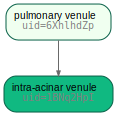

In [66]:
bt.Tissue.filter(ontology_id="UBERON:8600061").one().view_parents()

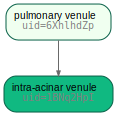

In [68]:
bt.Tissue.from_values(["UBERON:8600061"], field="ontology_id")[0].view_parents()

In [72]:
bt.Tissue.public().df().loc["UBERON:8600061"].parents

array(['UBERON:8600024', 'UBERON:0008874', 'UBERON:0010369'], dtype=object)

In [65]:
bt.Tissue.filter().df(include=["parents__ontology_id"])

,parents__ontology_id,uid,name,ontology_id,abbr,synonyms,description,source_id,run_id,created_by_id,updated_at
27,"[UBERON:0001560, UBERON:0005156]",20geV8TQ,uterine cervix,UBERON:0000002,None,neck of uterus|uterine cervix|cervical canal o...,"Lower, Narrow Portion Of The Uterus Where It J...",24.0,None,1,2023-11-22 12:56:57.143896+00:00
28,"[UBERON:0004121, UBERON:0002268, UBERON:001031...",7adwnYzJ,nose,UBERON:0000004,None,nasal sac|peripheral olfactory organ|nose,"The Olfactory Organ Of Vertebrates, Consisting...",24.0,None,1,2023-11-22 12:56:57.143959+00:00
29,"[UBERON:0004119, UBERON:0034922]",1H8ChOUN,islet of Langerhans,UBERON:0000006,None,pancreatic insula|pancreatic islet,The Clusters Of Hormone-Producing Cells That A...,24.0,None,1,2023-11-22 12:56:57.144013+00:00
30,"[UBERON:0004121, UBERON:0034944]",4At9Dys5,zone of skin,UBERON:0000014,None,skin|skin region|portion of skin|skin zone|reg...,Any Portion Of The Organ That Covers That Body...,24.0,None,1,2023-11-22 12:56:57.144065+00:00
31,"[UBERON:0004119, UBERON:0000471]",6Pa15wyu,endocrine pancreas,UBERON:0000016,None,endocrine pancreas|pars endocrina pancreatis,The Part Of The Pancreas That Is Part Of The E...,24.0,None,1,2023-11-22 12:56:57.144116+00:00
...,...,...,...,...,...,...,...,...,...,...,...
15571,[UBERON:8600030],2Odu6v1J,chorionic terminal villous capillary,UBERON:8600041,None,None,A Capillary That Is Part Of A Chorionic Termin...,96.0,None,1,2024-09-09 10:50:12.721936+00:00
15574,[UBERON:8600043],3y3Ugd1z,left lateral wall of urinary bladder,UBERON:8600044,None,left wall of urinary bladder,A Lateral Wall Of The Urinary Bladder That Is ...,96.0,None,1,2024-09-09 10:50:12.722297+00:00
15575,[UBERON:8600043],3RQjC3wG,right lateral wall of urinary bladder,UBERON:8600045,None,right wall of urinary bladder,A Lateral Wall Of The Urinary Bladder That Is ...,96.0,None,1,2024-09-09 10:50:12.722417+00:00
15591,[UBERON:8600024],1BNq2HpI,intra-acinar venule,UBERON:8600061,None,None,A Venule That Receives Drainage From The Capil...,96.0,None,1,2024-09-09 10:50:12.724339+00:00


In [11]:
[i.delete() for i in bt.DevelopmentalStage.filter()]

ProtectedError: ("Cannot delete some instances of model 'DevelopmentalStage' because they are referenced through protected foreign keys: 'ArtifactDevelopmentalStage.developmentalstage'.", {ArtifactDevelopmentalStage(created_by_id=1, artifact_id=13, developmentalstage_id=1), ArtifactDevelopmentalStage(created_by_id=1, artifact_id=1, developmentalstage_id=1), ArtifactDevelopmentalStage(created_by_id=1, artifact_id=4, developmentalstage_id=1)})

# load the latest datasets / load datasets that were initially dropped

In [5]:
bt.DevelopmentalStage.public().df().loc["HsapDv:0000144"].parents

array(['HsapDv:0000000', 'HsapDv:0000240', 'HsapDv:0000267',
       'HsapDv:0000226', 'HsapDv:0000258', 'HsapDv:0010000',
       'HsapDv:0000001'], dtype=object)

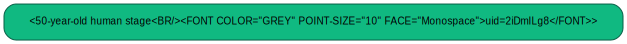

In [8]:
bt.DevelopmentalStage.filter(ontology_id="HsapDv:0000144").one().view_parents()#.df(include=["parents"])

In [9]:
bt.DevelopmentalStage.filter(ontology_id="HsapDv:0000144").one().parents.filter()

<QuerySet []>

In [7]:
bt.DevelopmentalStage.import_from_source(update=True)

In [25]:
[i.delete() for i in bt.DevelopmentalStage.filter()]#.delete()
#bt.DevelopmentalStage.import_from_source()

ProtectedError: ("Cannot delete some instances of model 'DevelopmentalStage' because they are referenced through protected foreign keys: 'ArtifactDevelopmentalStage.developmentalstage'.", {ArtifactDevelopmentalStage(created_by_id=1, artifact_id=13, developmentalstage_id=1), ArtifactDevelopmentalStage(created_by_id=1, artifact_id=1, developmentalstage_id=1), ArtifactDevelopmentalStage(created_by_id=1, artifact_id=4, developmentalstage_id=1)})

In [80]:
len(list(bt.Disease.filter(ontology_id="MONDO:0000005").one().parents.filter()))

1

In [75]:
bt.Disease.public().df().loc["MONDO:0000005"].parents

array(['MONDO:0100118', 'MONDO:0004907'], dtype=object)